In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('uber.csv')

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Basic statistics
print(data.describe())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

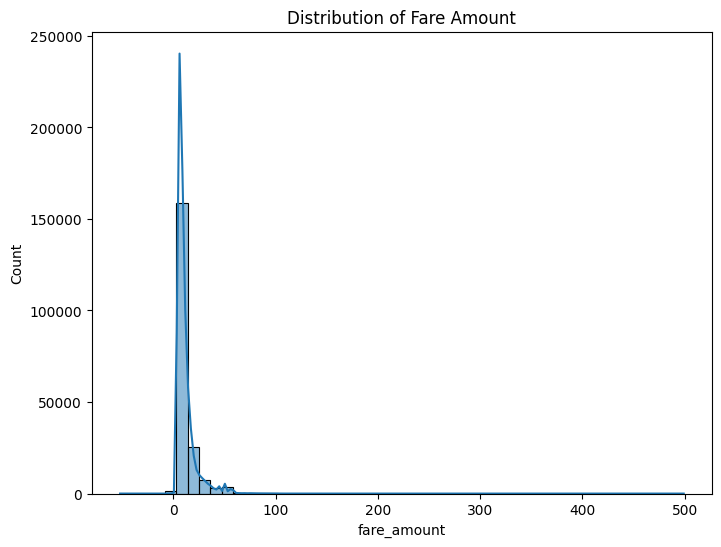

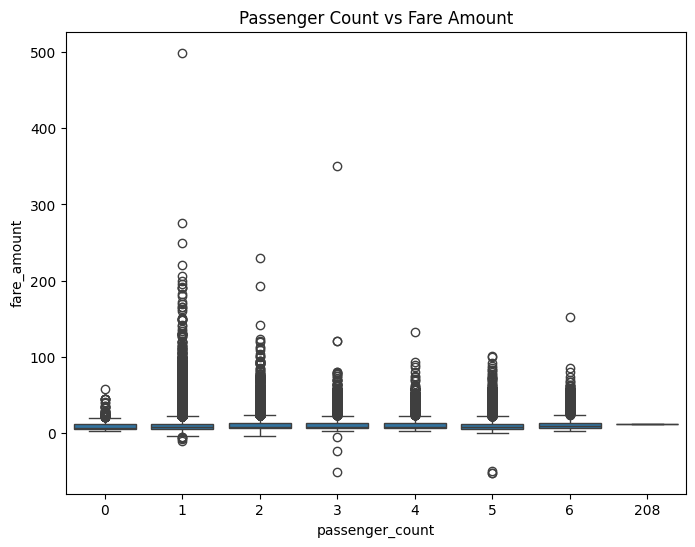

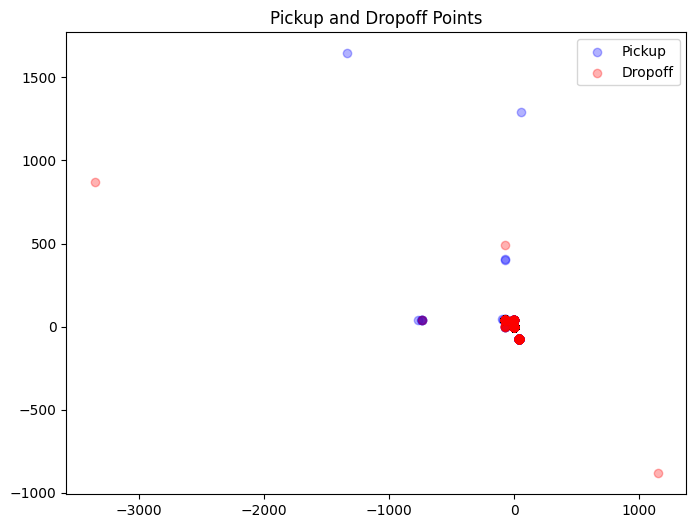

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.show()

# Plot passenger count vs fare amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=data)
plt.title('Passenger Count vs Fare Amount')
plt.show()

# Pickup and dropoff points visualization (Scatter plot for geographical points)
plt.figure(figsize=(8, 6))
plt.scatter(data['pickup_longitude'], data['pickup_latitude'], color='blue', label='Pickup', alpha=0.3)
plt.scatter(data['dropoff_longitude'], data['dropoff_latitude'], color='red', label='Dropoff', alpha=0.3)
plt.legend()
plt.title('Pickup and Dropoff Points')
plt.show()


In [3]:
from datetime import datetime

# Convert pickup_datetime to datetime format and extract useful features
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day'] = data['pickup_datetime'].dt.day
data['month'] = data['pickup_datetime'].dt.month
data['weekday'] = data['pickup_datetime'].dt.weekday

# Function to calculate the Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth radius in kilometers
    lon1, lon2 = np.radians(lon1), np.radians(lon2)
    lat1, lat2 = np.radians(lat1), np.radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate the distance traveled
data['distance'] = haversine(data['pickup_longitude'], data['pickup_latitude'],
                             data['dropoff_longitude'], data['dropoff_latitude'])

# Drop irrelevant columns
data = data.drop(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

# Check final data structure
print(data.head())


   Unnamed: 0  fare_amount  passenger_count  hour  day  month  weekday  \
0    24238194          7.5                1    19    7      5        3   
1    27835199          7.7                1    20   17      7        4   
2    44984355         12.9                1    21   24      8        0   
3    25894730          5.3                3     8   26      6        4   
4    17610152         16.0                5    17   28      8        3   

   distance  
0  1.683323  
1  2.457590  
2  5.036377  
3  1.661683  
4  4.475450  


In [4]:
from sklearn.model_selection import train_test_split

# Define target (fare_amount) and features
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predict on test data
linear_pred = linear_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
gb_pred = gradient_boosting_model.predict(X_test)


In [6]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Linear Regression
lr_rmse, lr_r2 = evaluate_model(y_test, linear_pred)
print(f"Linear Regression: RMSE = {lr_rmse}, R² = {lr_r2}")

# Evaluate Random Forest
rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred)
print(f"Random Forest: RMSE = {rf_rmse}, R² = {rf_r2}")

# Evaluate Gradient Boosting
gb_rmse, gb_r2 = evaluate_model(y_test, gb_pred)
print(f"Gradient Boosting: RMSE = {gb_rmse}, R² = {gb_r2}")


Linear Regression: RMSE = 10.191737114922901, R² = 0.0014653232272617833
Random Forest: RMSE = 5.981955998982084, R² = 0.6560041890252839
Gradient Boosting: RMSE = 5.7920746882071095, R² = 0.6774960543271541


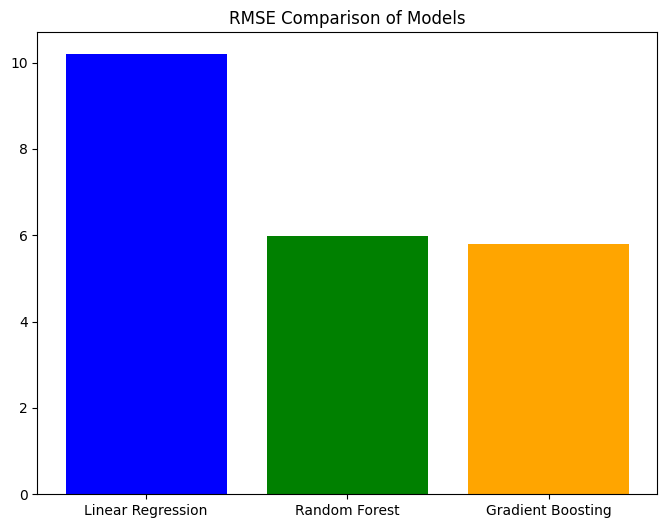

The best model is Gradient Boosting with the lowest RMSE.


In [7]:
# Compare model performance
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse_scores = [lr_rmse, rf_rmse, gb_rmse]
r2_scores = [lr_r2, rf_r2, gb_r2]

# Plotting the comparison of RMSE
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title('RMSE Comparison of Models')
plt.show()

# Conclusion: Select the best model based on RMSE and R² scores.
best_model = models[np.argmin(rmse_scores)]
print(f"The best model is {best_model} with the lowest RMSE.")
